## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: GM12878

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[1]
cell_line

'GM12878'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [6]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV

In [18]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [34]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [20]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [35]:
model=FFNN

In [31]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-05 19:41:34,140] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-05 19:41:34,259] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1_2' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.429900156536335
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.004722048756819723
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 64
    optimizer: RMSprop
    weight_decay: 0.00016234831727379693

===============> MODEL TESTING
AUPRC test score: 0.42584583365361833


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-05 19:41:34,372] Using an existing study with name 'GM12878_active_E_vs_inactive_E_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.4110329245268358
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    dropout_l2: 0.4
    dropout_l3: 0.4
    lr: 0.00036473621016781213
    n_layers: 4
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 16
    n_units_l3: 32
    optimizer: Nadam
    weight_decay: 0.0005580402826538931

===============> MODEL TESTING
AUPRC test score: 0.4120396048130435


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.43433391876071326
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    lr: 0.0014842816154764045
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.006302021072074129

===============> MODEL TESTING
AUPRC test score: 0.42312989388495115



3-FOLD CROSS-V

In [32]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [33]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [40]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:57,352] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21492178802700004
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    dropout_l2: 0
    dropout_l3: 0
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 5
    kernel_size_l3: 5
    lr: 6.60222536212025e-05
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 64
    out_channels_l2: 128
    out_channels_l3: 512
    weight_decay: 0.0005100105787170112

===============> MODEL TESTING
AUPRC test score: 0.20891225843080327




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:59,734] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20838958111703193
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 15
    lr: 0.0002778582173635016
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 16
    weight_decay: 0.001623848349006169

===============> MODEL TESTING
AUPRC test score: 0.21289568009435755




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:59,996] Using an existing study with name 'GM12878_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.18563380281690137
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    dropout_l2: 0.4
    dropout_l3: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 15
    kernel_size_l3: 15
    lr: 0.009291877547892406
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 96
    out_channels_l2: 128
    out_channels_l3: 256
    weight_decay: 0.0035619153479302967

===============> MODEL TESTING
AUPRC test score: 0.18261171797418074



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20147


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [44]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [15]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [45]:
model=FFNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:12,362] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3357788556075496
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    lr: 8.122570739840629e-05
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.008446187591144374

===============> MODEL TESTING
AUPRC test score: 0.3477270630884187


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:12,697] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:12,946] Using an existing study with name 'GM12878_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3649531020412253
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    dropout_l2: 0.4
    dropout_l3: 0.4
    lr: 0.003376686164252272
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 128
    n_units_l2: 16
    n_units_l3: 4
    optimizer: Nadam
    weight_decay: 0.0016717161491293262

===============> MODEL TESTING
AUPRC test score: 0.3316197255332237


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.35033186396758415
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.4
    lr: 0.00013063385058217388
    n_layers: 3
    n_units_l0: 256
    n_units_l1: 16
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.0036788660219933093

===============> MODEL TESTING
AUPRC test scor

In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [49]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:01,618] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2430659825656718
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 11
    lr: 0.00016343686670832296
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 64
    weight_decay: 0.008762732014361048

===============> MODEL TESTING
AUPRC test score: 0.2478160100969133




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:02,259] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:02,551] Using an existing study with name 'GM12878_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


  Value:  0.2483861751769983
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 11
    lr: 0.005343086889958524
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.005879451743924784

===============> MODEL TESTING
AUPRC test score: 0.2290765660807903


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24903549101923125
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 5
    kernel_size_l2: 5
    lr: 0.008929702508860111
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 96
    weight_decay: 0.0002101453221387589

===============> MODEL TESTING
AUPRC test score: 0.23478488265062664



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.23723


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [53]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [21]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [54]:
model=FFNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:16,205] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8308661883847265
  Params: 
    dropout_l0: 0.0
    lr: 0.0017700536170613798
    n_layers: 1
    n_units_l0: 64
    optimizer: Adam
    weight_decay: 0.0029966076037812443

===============> MODEL TESTING
AUPRC test score: 0.8373824961052855


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:16,376] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:16,590] Using an existing study with name 'GM12878_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8419799421786895
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    lr: 6.920264791468706e-05
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 128
    optimizer: Nadam
    weight_decay: 0.001199732334618711

===============> MODEL TESTING
AUPRC test score: 0.8332549394041929


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8354984710607446
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0.0
    dropout_l3: 0.4
    lr: 0.0035211647832739503
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 16
    n_units_l2: 64
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.0001812333181846365

===============> MODEL TESTING
AUPRC test score: 0.8487954250626671



3-FOLD CROSS-VALID

In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [58]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:07,041] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:07,304] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7824104440734543
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.4
    dropout_l3: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 5
    kernel_size_l2: 15
    kernel_size_l3: 11
    lr: 0.00013156245519630643
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 32
    out_channels_l2: 128
    out_channels_l3: 128
    weight_decay: 0.0019215236851149772

===============> MODEL TESTING
AUPRC test score: 0.8061541783069651


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7757187615230814
  Params: 
    dropout_l0: 0
    dropout_l1: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 15
    lr: 3.0977337923095036e-05
    n_layers: 2
    optimizer: Nadam
    out_c

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:07,963] Using an existing study with name 'GM12878_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.7693247391791351


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7470384577280992
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 15
    lr: 2.122448193057254e-05
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 32
    weight_decay: 0.00031139480592451

===============> MODEL TESTING
AUPRC test score: 0.7796428666690387



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.78504


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [62]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [27]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [63]:
model=FFNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:21,379] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5600505224694551
  Params: 
    dropout_l0: 0.3
    lr: 8.153587274616033e-05
    n_layers: 1
    n_units_l0: 32
    optimizer: RMSprop
    weight_decay: 0.0021334922138613334

===============> MODEL TESTING
AUPRC test score: 0.5592548515763359


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:21,966] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5738339430305686
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.5
    lr: 0.0002531488769579297
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 32
    n_units_l2: 16
    optimizer: RMSprop
    weight_decay: 0.0009357389033811897

===============> MODEL TESTING
AUPRC test score: 0.564550795918327


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:22,339] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5634418735407766
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    lr: 0.004804075200647329
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.002537197181779462

===============> MODEL TESTING
AUPRC test score: 0.5663923860960679



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.5634


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [67]:
model=CNN

In [37]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:24,021] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5578701666720435
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    dropout_l2: 0
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 11
    lr: 0.0035482804771382634
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 32
    out_channels_l2: 96
    weight_decay: 0.0005529571154191932

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:24,647] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.550262241595657


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5606925950130216
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 5
    lr: 3.593161518584798e-05
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 32
    weight_decay: 0.01285463201614025

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:25,170] Using an existing study with name 'GM12878_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.5654495106658182


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5561861020118548
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 5
    lr: 0.00032622231399867155
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 32
    weight_decay: 0.0036477719364367074

===============> MODEL TESTING
AUPRC test score: 0.5636270226621353



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.55978


In [38]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [39]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [71]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [33]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [72]:
model=FFNN

In [35]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:25,700] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.337413583953764
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    lr: 0.0005687522375344087
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 128
    optimizer: Nadam
    weight_decay: 0.0010160939500190376

===============> MODEL TESTING
AUPRC test score: 0.3414601297771055


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:26,286] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3168807277682145
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.0
    lr: 0.0016575982004467605
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 128
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.0025903997005961355

===============> MODEL TESTING
AUPRC test score: 0.327077906412745


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-11-04 07:08:26,699] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.160412087912088
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.0
    lr: 0.05042679596881464
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 32
    n_units_l2: 4
    optimizer: RMSprop
    weight_decay: 0.001898431074411057

===============> MODEL TESTING
AUPRC test score: 0.1545607790988737



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.27437


In [36]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [37]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [77]:
model=CNN

In [43]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:32,046] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1988950892320466
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 15
    lr: 1.6200817577636235e-05
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 96
    weight_decay: 0.058706522132779305

===============> MODEL TESTING
AUPRC test score: 0.22185208274147128


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:32,378] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.
/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:39:32,667] Using an existing study with name 'GM12878_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20521005124104746
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 15
    lr: 0.0009818073974336302
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.00024951595851365366

===============> MODEL TESTING
AUPRC test score: 0.19620401330077628


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21922290914638595
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0
    dropout_l2: 0
    dropout_l3: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 11
    kernel_size_l3: 5
    lr: 0.00038466677926644264
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 128
    out_channels_l3: 256
    weight_decay: 0.015787827

In [44]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [45]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

In [8]:
from BIOINF_tesi.models.utils import select_augmented_models
results_dict = select_augmented_models(results_dict, verbose=True)


A549
active_E_vs_inactive_E
pvalue: 0.27523352407483426
Best augmentation method: smote

A549
active_EP_vs_inactive_rest
pvalue: 0.8272593465627113
Best augmentation method: smote

H1
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: smote

K562
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: smote


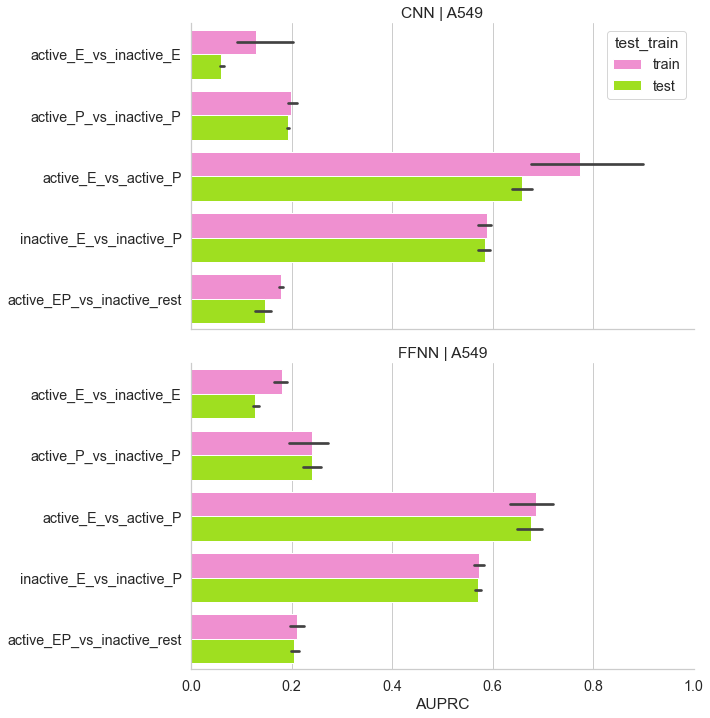

In [15]:
from BIOINF_tesi.models.utils import plot_scores
cell_line=CELL_LINES[0]
plot_scores(cells=cell_line, models=['FFNN','CNN'])

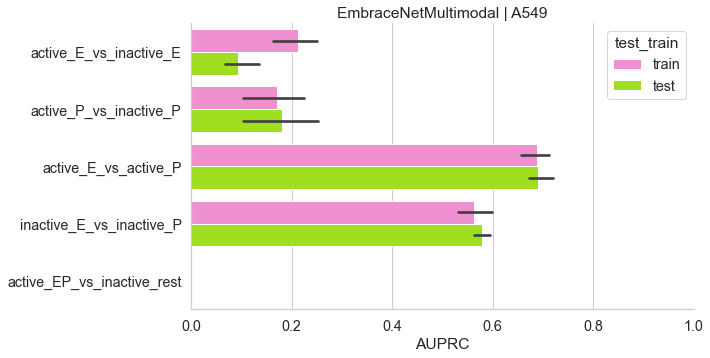

In [12]:
plot_scores(cells=cell_line, models='EmbraceNetMultimodal')

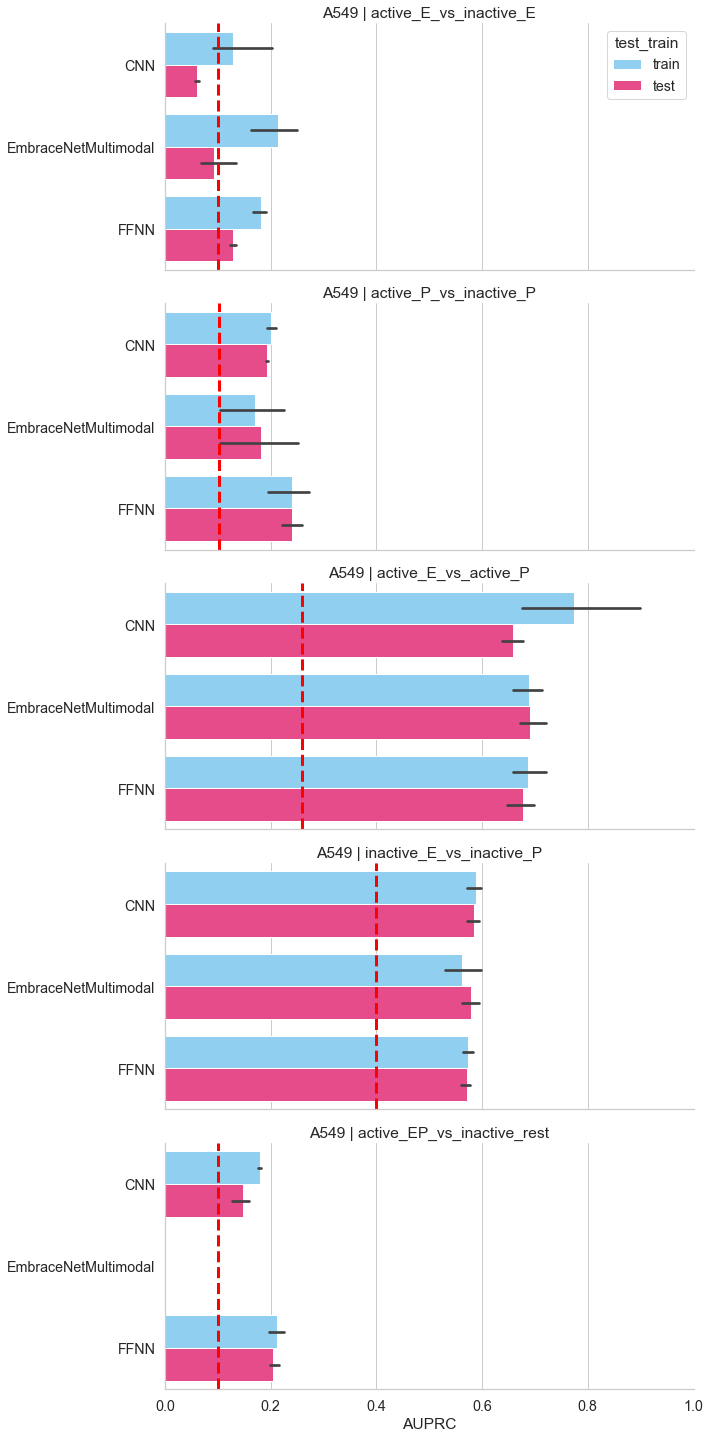

In [8]:
from BIOINF_tesi.models.utils import plot_scores
cell_line=CELL_LINES[0]
data=plot_scores(cells=cell_line, models=['FFNN','CNN','EmbraceNetMultimodal'], palette=0)

In [19]:
plot.axes

array([[<AxesSubplot:title={'center':'FFNN | A549'}, xlabel='AUPRC'>]],
      dtype=object)

In [52]:
a=torch.tensor([0.3,0.7])
selection_probabilities = a.repeat(10,1)

In [53]:
selection_probabilities

tensor([[0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000]])

In [54]:
target_modalities = torch.round(torch.rand(10)).to(torch.int64)
availabilities = torch.ones(10, 2, dtype=torch.float)

In [55]:
availabilities

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [56]:
selection_probabilities = torch.mul(selection_probabilities, availabilities)

In [57]:
selection_probabilities

tensor([[0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000]])

In [58]:
probability_sum = torch.sum(selection_probabilities, dim=-1, keepdim=True)
selection_probabilities = torch.div(selection_probabilities, probability_sum)

In [59]:
# normalisation
selection_probabilities

tensor([[0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000],
        [0.3000, 0.7000]])

In [60]:
c=20
modality_indices = torch.multinomial(selection_probabilities, num_samples=c, replacement=True)  # [batch_size, embracement_size]
modality_toggles = nn.functional.one_hot(modality_indices, num_classes=2).float()  # [batch_size, embracement_size, num_modalities]

In [61]:
modality_indices

tensor([[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]])

In [62]:
modality_toggles

tensor([[[0., 1.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 0.],
         [1., 0.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [1., 0.]],

        [[0., 1.],
         [1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
        

In [8]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [9]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


In [10]:
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline
from BIOINF_tesi.models import EmbraceNetMultimodal, ConcatNetMultimodal
from BIOINF_tesi.models.utils import Kfold_CV_Multimodal

In [11]:
model=EmbraceNetMultimodal

In [12]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}--',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST--')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:425: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 15:50:42,386] A new study created in RDB with name: GM12878_active_E_vs_active_P_EmbraceNetMultimodal--_1


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99
2
torch.Size([99, 64]) torch.Size([99, 1024])
99


KeyboardInterrupt: 